## TASK 4 - Scene Recognition using Convolutional Neural Networks

Group Number: Group_9-11_11


In [2]:
%load_ext autoreload
%autoreload 1
%aimport my_model, utils, my_datamodule, my_model, my_trainer
%matplotlib inline
import os

import numpy as np
import torch
from torchinfo import summary

import my_datamodule
import my_model
import my_trainer
import utils

torch.manual_seed(30)
np.random.seed(30)

if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

# Check GPU connection
gpu_active = torch.cuda.is_available()
print("GPU is used" if gpu_active else "CPU is used")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GPU is used


### 1. Data import and Preparation

In TASK3 we used a common computer vision processing step for classification problems in computer vision - manual feature extraction. This time we want to use a learning approach which does not need handcrafted inputs. 

Implement the **get_transforms** method. Make sure it returns a transformation that maps input images to tensor values and resizes them to a square image.

For simplicity and actuality you will detect if a person wears a face mask or not. Follow the instructions in the assignment description. Implement the get_transform method of **my_datamodule.DataModule** and create an instance of **DataModule**. Use an image size of 64 and a batch_size around **64**. Depending on your processor you can increase the amount of threads that load data with the parameter **num_worker**. For example use **num_workers=4** to start four worker threads for data loading and preprocessing. 

In [3]:
datamodule = my_datamodule.DataModule(img_size=64, batch_size=64)

### 2. Simple Scene CNN
#### 2.1 Network Structure

This section will familiarize you with the steps of creating a deep artificial neural network from scratch. Implement the **__init__** and **forward** methods of **my_model.MaskClassifier** according to the instructions.

Create a simple classification model using ***model=my_model.MaskClassifier(..)***. Set the image size to **64** (the dataset will be proccessed to squared images) and drop out value to **0**.

Take a look at the structure of your model by calling ***summary(model, (32, 3, img_size, img_size))***

In [15]:
simple_model = my_model.MaskClassifier("simple_model", 64, 0)

In [16]:
summary(simple_model, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           --                        --
├─Sequential: 1-1                        [32, 128, 4, 4]           --
│    └─Conv2d: 2-1                       [32, 32, 64, 64]          896
│    └─ReLU: 2-2                         [32, 32, 64, 64]          --
│    └─BatchNorm2d: 2-3                  [32, 32, 64, 64]          64
│    └─MaxPool2d: 2-4                    [32, 32, 32, 32]          --
│    └─Dropout: 2-5                      [32, 32, 32, 32]          --
│    └─Conv2d: 2-6                       [32, 64, 32, 32]          18,496
│    └─ReLU: 2-7                         [32, 64, 32, 32]          --
│    └─BatchNorm2d: 2-8                  [32, 64, 32, 32]          128
│    └─MaxPool2d: 2-9                    [32, 64, 16, 16]          --
│    └─Dropout: 2-10                     [32, 64, 16, 16]          --
│    └─Conv2d: 2-11                      [32, 128, 16, 16]         73,856
│    

***
#### Q1: Take a look at the structure of the MaskClassifier CNN. What does the column 'Output Shape' represent? What does the column Param represent? Why is the shape decreasing? Finally, explain why the last layer has length 1. 

#ANSWER HERE

#### 2.2 Training 

In this step you will train the model with the training and validation data set iterator. The **my_trainer** module provides functionality for training and logging the learning progress.

First create a trainer instance using my_trainer.Trainer(...) and pass the previosuly created model and datamodule to it. If you have a device that supports cuda you can pass **gpu=True** to speed up training. Use trainer.fit(...) to start the training process. Depending on wether you use a GPU or CPU and the number of epochs, the training can take a while. Start with a learning rate of **0.0001** and **50** epochs. The loss should decrease and the accuracy on the validation should increase. The weights of the best model are saved in separate files in your results directory automatically.

In [17]:
trainer = my_trainer.Trainer(simple_model, datamodule,gpu=gpu_active)
trainer.fit(epochs=50,lr=0.0001)

Epoch 0: 100%|██████████| 42/42 [00:09<00:00,  4.64it/s]


Epoch 0 Training: Loss: 0.6276228427886963 Accuracy: 0.5440133213996887
Epoch 0 Validation: Loss: 0.5347055196762085 Accuracy: 0.5000868439674377


Epoch 1: 100%|██████████| 42/42 [00:08<00:00,  4.68it/s]


Epoch 1 Training: Loss: 0.42055320739746094 Accuracy: 0.690018355846405
Epoch 1 Validation: Loss: 0.2793927490711212 Accuracy: 0.9164062142372131


Epoch 2: 100%|██████████| 42/42 [00:08<00:00,  5.04it/s]


Epoch 2 Training: Loss: 0.35012590885162354 Accuracy: 0.7160599827766418
Epoch 2 Validation: Loss: 0.2021065503358841 Accuracy: 0.945225715637207


Epoch 3: 100%|██████████| 42/42 [00:08<00:00,  5.07it/s]


Epoch 3 Training: Loss: 0.2815398573875427 Accuracy: 0.7646519541740417
Epoch 3 Validation: Loss: 0.15953944623470306 Accuracy: 0.9582465291023254


Epoch 4: 100%|██████████| 42/42 [00:08<00:00,  5.01it/s]


Epoch 4 Training: Loss: 0.2533528804779053 Accuracy: 0.8389995098114014
Epoch 4 Validation: Loss: 0.13216859102249146 Accuracy: 0.9568576812744141


Epoch 5: 100%|██████████| 42/42 [00:08<00:00,  4.93it/s]


Epoch 5 Training: Loss: 0.18977077305316925 Accuracy: 0.8628662824630737
Epoch 5 Validation: Loss: 0.09556535631418228 Accuracy: 0.9711806178092957


Epoch 6: 100%|██████████| 42/42 [00:08<00:00,  4.91it/s]


Epoch 6 Training: Loss: 0.15904265642166138 Accuracy: 0.8644402623176575
Epoch 6 Validation: Loss: 0.08684859424829483 Accuracy: 0.9712674021720886


Epoch 7: 100%|██████████| 42/42 [00:08<00:00,  4.85it/s]


Epoch 7 Training: Loss: 0.13837118446826935 Accuracy: 0.860090434551239
Epoch 7 Validation: Loss: 0.08409031480550766 Accuracy: 0.9750868678092957


Epoch 8: 100%|██████████| 42/42 [00:08<00:00,  4.70it/s]


Epoch 8 Training: Loss: 0.1147940382361412 Accuracy: 0.8829269409179688
Epoch 8 Validation: Loss: 0.09465806931257248 Accuracy: 0.9763889312744141


Epoch 9: 100%|██████████| 42/42 [00:08<00:00,  4.77it/s]


Epoch 9 Training: Loss: 0.12085888534784317 Accuracy: 0.8664148449897766
Epoch 9 Validation: Loss: 0.12082499265670776 Accuracy: 0.9737847447395325


Epoch 10: 100%|██████████| 42/42 [00:09<00:00,  4.61it/s]


Epoch 10 Training: Loss: 0.11772745847702026 Accuracy: 0.8710507750511169
Epoch 10 Validation: Loss: 0.08937264233827591 Accuracy: 0.972569465637207


Epoch 11: 100%|██████████| 42/42 [00:08<00:00,  4.92it/s]


Epoch 11 Training: Loss: 0.10933736711740494 Accuracy: 0.8703926801681519
Epoch 11 Validation: Loss: 0.07717988640069962 Accuracy: 0.9817708134651184


Epoch 12: 100%|██████████| 42/42 [00:08<00:00,  5.19it/s]


Epoch 12 Training: Loss: 0.09951560944318771 Accuracy: 0.876802921295166
Epoch 12 Validation: Loss: 0.07366219907999039 Accuracy: 0.98046875


Epoch 13: 100%|██████████| 42/42 [00:08<00:00,  4.90it/s]


Epoch 13 Training: Loss: 0.10229784995317459 Accuracy: 0.8717948198318481
Epoch 13 Validation: Loss: 0.13003993034362793 Accuracy: 0.9776909947395325


Epoch 14: 100%|██████████| 42/42 [00:08<00:00,  4.93it/s]


Epoch 14 Training: Loss: 0.11738692224025726 Accuracy: 0.8638964891433716
Epoch 14 Validation: Loss: 0.1565481424331665 Accuracy: 0.9684895873069763


Epoch 15: 100%|██████████| 42/42 [00:08<00:00,  4.94it/s]


Epoch 15 Training: Loss: 0.10675879567861557 Accuracy: 0.8717089891433716
Epoch 15 Validation: Loss: 0.08850250393152237 Accuracy: 0.9828993678092957


Epoch 16: 100%|██████████| 42/42 [00:08<00:00,  5.14it/s]


Epoch 16 Training: Loss: 0.10316983610391617 Accuracy: 0.8709649443626404
Epoch 16 Validation: Loss: 0.09040842205286026 Accuracy: 0.9802951812744141


Epoch 17: 100%|██████████| 42/42 [00:08<00:00,  4.74it/s]


Epoch 17 Training: Loss: 0.09643249213695526 Accuracy: 0.877289354801178
Epoch 17 Validation: Loss: 0.09129935503005981 Accuracy: 0.984288215637207


Epoch 18: 100%|██████████| 42/42 [00:09<00:00,  4.67it/s]


Epoch 18 Training: Loss: 0.09631679207086563 Accuracy: 0.8763450384140015
Epoch 18 Validation: Loss: 0.08423864841461182 Accuracy: 0.9829861521720886


Epoch 19: 100%|██████████| 42/42 [00:08<00:00,  4.76it/s]


Epoch 19 Training: Loss: 0.09552589058876038 Accuracy: 0.8754006624221802
Epoch 19 Validation: Loss: 0.09809821844100952 Accuracy: 0.980381965637207


Epoch 20: 100%|██████████| 42/42 [00:09<00:00,  4.32it/s]


Epoch 20 Training: Loss: 0.09534112364053726 Accuracy: 0.8744276165962219
Epoch 20 Validation: Loss: 0.09757088869810104 Accuracy: 0.9842014312744141


Epoch 21: 100%|██████████| 42/42 [00:08<00:00,  4.84it/s]


Epoch 21 Training: Loss: 0.10067324340343475 Accuracy: 0.8670444488525391
Epoch 21 Validation: Loss: 0.10347970575094223 Accuracy: 0.980381965637207


Epoch 22: 100%|██████████| 42/42 [00:08<00:00,  4.88it/s]


Epoch 22 Training: Loss: 0.09882857650518417 Accuracy: 0.8710507750511169
Epoch 22 Validation: Loss: 0.10473766177892685 Accuracy: 0.9842014312744141


Epoch 23: 100%|██████████| 42/42 [00:08<00:00,  4.87it/s]


Epoch 23 Training: Loss: 0.09039261937141418 Accuracy: 0.8804087042808533
Epoch 23 Validation: Loss: 0.102518729865551 Accuracy: 0.9815972447395325


Epoch 24: 100%|██████████| 42/42 [00:09<00:00,  4.57it/s]


Epoch 24 Training: Loss: 0.09480054676532745 Accuracy: 0.8738266825675964
Epoch 24 Validation: Loss: 0.14274601638317108 Accuracy: 0.9790799021720886


Epoch 25: 100%|██████████| 42/42 [00:09<00:00,  4.30it/s]


Epoch 25 Training: Loss: 0.12215238809585571 Accuracy: 0.8580872416496277
Epoch 25 Validation: Loss: 0.20720267295837402 Accuracy: 0.9645833373069763


Epoch 26: 100%|██████████| 42/42 [00:08<00:00,  5.15it/s]


Epoch 26 Training: Loss: 0.12859651446342468 Accuracy: 0.8623225688934326
Epoch 26 Validation: Loss: 0.11501950770616531 Accuracy: 0.9752604365348816


Epoch 27: 100%|██████████| 42/42 [00:08<00:00,  4.96it/s]


Epoch 27 Training: Loss: 0.10854918509721756 Accuracy: 0.8702208995819092
Epoch 27 Validation: Loss: 0.10164665430784225 Accuracy: 0.9738715291023254


Epoch 28: 100%|██████████| 42/42 [00:08<00:00,  4.94it/s]


Epoch 28 Training: Loss: 0.10328271239995956 Accuracy: 0.8763450384140015
Epoch 28 Validation: Loss: 0.11296788603067398 Accuracy: 0.9777777791023254


Epoch 29: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]


Epoch 29 Training: Loss: 0.09696643799543381 Accuracy: 0.8724244236946106
Epoch 29 Validation: Loss: 0.09602364897727966 Accuracy: 0.9778645634651184


Epoch 30: 100%|██████████| 42/42 [00:10<00:00,  4.18it/s]


Epoch 30 Training: Loss: 0.092568039894104 Accuracy: 0.8774611353874207
Epoch 30 Validation: Loss: 0.10266069322824478 Accuracy: 0.9791666865348816


Epoch 31: 100%|██████████| 42/42 [00:11<00:00,  3.56it/s]


Epoch 31 Training: Loss: 0.08748314529657364 Accuracy: 0.8838713765144348
Epoch 31 Validation: Loss: 0.10763172060251236 Accuracy: 0.9778645634651184


Epoch 32: 100%|██████████| 42/42 [00:11<00:00,  3.61it/s]


Epoch 32 Training: Loss: 0.08992856740951538 Accuracy: 0.8789492249488831
Epoch 32 Validation: Loss: 0.10486575961112976 Accuracy: 0.9778645634651184


Epoch 33: 100%|██████████| 42/42 [00:12<00:00,  3.24it/s]


Epoch 33 Training: Loss: 0.0993465781211853 Accuracy: 0.8641541004180908
Epoch 33 Validation: Loss: 0.10643013566732407 Accuracy: 0.9817708134651184


Epoch 34: 100%|██████████| 42/42 [00:12<00:00,  3.30it/s]


Epoch 34 Training: Loss: 0.09473288804292679 Accuracy: 0.8727392554283142
Epoch 34 Validation: Loss: 0.10840851813554764 Accuracy: 0.9817708134651184


Epoch 35: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 35 Training: Loss: 0.08642251044511795 Accuracy: 0.8829555511474609
Epoch 35 Validation: Loss: 0.11092421412467957 Accuracy: 0.9830729365348816


Epoch 36: 100%|██████████| 42/42 [00:25<00:00,  1.65it/s]


Epoch 36 Training: Loss: 0.08602923154830933 Accuracy: 0.8812671899795532
Epoch 36 Validation: Loss: 0.11642087250947952 Accuracy: 0.9817708134651184


Epoch 37: 100%|██████████| 42/42 [00:16<00:00,  2.57it/s]


Epoch 37 Training: Loss: 0.08974888920783997 Accuracy: 0.8759730458259583
Epoch 37 Validation: Loss: 0.11823027580976486 Accuracy: 0.9830729365348816


Epoch 38: 100%|██████████| 42/42 [00:10<00:00,  3.90it/s]


Epoch 38 Training: Loss: 0.09220031648874283 Accuracy: 0.8736549615859985
Epoch 38 Validation: Loss: 0.12390794605016708 Accuracy: 0.9817708134651184


Epoch 39: 100%|██████████| 42/42 [00:10<00:00,  4.15it/s]


Epoch 39 Training: Loss: 0.09420982748270035 Accuracy: 0.869476854801178
Epoch 39 Validation: Loss: 0.11477885395288467 Accuracy: 0.9830729365348816


Epoch 40: 100%|██████████| 42/42 [00:10<00:00,  4.11it/s]


Epoch 40 Training: Loss: 0.0876956507563591 Accuracy: 0.878004789352417
Epoch 40 Validation: Loss: 0.12276684492826462 Accuracy: 0.9830729365348816


Epoch 41: 100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


Epoch 41 Training: Loss: 0.08680474758148193 Accuracy: 0.8789492249488831
Epoch 41 Validation: Loss: 0.11902422457933426 Accuracy: 0.984375


Epoch 42: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]


Epoch 42 Training: Loss: 0.08336611837148666 Accuracy: 0.8837855458259583
Epoch 42 Validation: Loss: 0.12121137976646423 Accuracy: 0.9830729365348816


Epoch 43: 100%|██████████| 42/42 [00:25<00:00,  1.67it/s]


Epoch 43 Training: Loss: 0.09165854752063751 Accuracy: 0.8724244236946106
Epoch 43 Validation: Loss: 0.1284904032945633 Accuracy: 0.984375


Epoch 44: 100%|██████████| 42/42 [00:13<00:00,  3.22it/s]


Epoch 44 Training: Loss: 0.09394599497318268 Accuracy: 0.867902934551239
Epoch 44 Validation: Loss: 0.12668855488300323 Accuracy: 0.984375


Epoch 45: 100%|██████████| 42/42 [00:12<00:00,  3.48it/s]


Epoch 45 Training: Loss: 0.08332577347755432 Accuracy: 0.8831273317337036
Epoch 45 Validation: Loss: 0.1290377527475357 Accuracy: 0.984375


Epoch 46: 100%|██████████| 42/42 [00:08<00:00,  4.90it/s]


Epoch 46 Training: Loss: 0.09291096776723862 Accuracy: 0.8704785108566284
Epoch 46 Validation: Loss: 0.13006505370140076 Accuracy: 0.984375


Epoch 47: 100%|██████████| 42/42 [00:08<00:00,  4.71it/s]


Epoch 47 Training: Loss: 0.08742105215787888 Accuracy: 0.9036458134651184
Epoch 47 Validation: Loss: 0.13164351880550385 Accuracy: 0.984375


Epoch 48: 100%|██████████| 42/42 [00:10<00:00,  4.15it/s]


Epoch 48 Training: Loss: 0.08412874490022659 Accuracy: 0.9977678656578064
Epoch 48 Validation: Loss: 0.13519716262817383 Accuracy: 0.9830729365348816


Epoch 49: 100%|██████████| 42/42 [00:10<00:00,  3.89it/s]


Epoch 49 Training: Loss: 0.08767793327569962 Accuracy: 0.9973958134651184
Epoch 49 Validation: Loss: 0.131913959980011 Accuracy: 0.984375


#### 1.3 Performance Evaluation 

Test the model with **trainer.test()** and plot the model performance of the last training session with ***plot_performance(..)***.

***Submission:*** Save the output of ***trainer.plot_performance(..)*** as **task4_model_simple.png**

performance loss: 0.15229067206382751 accuracy: 0.9818181395530701


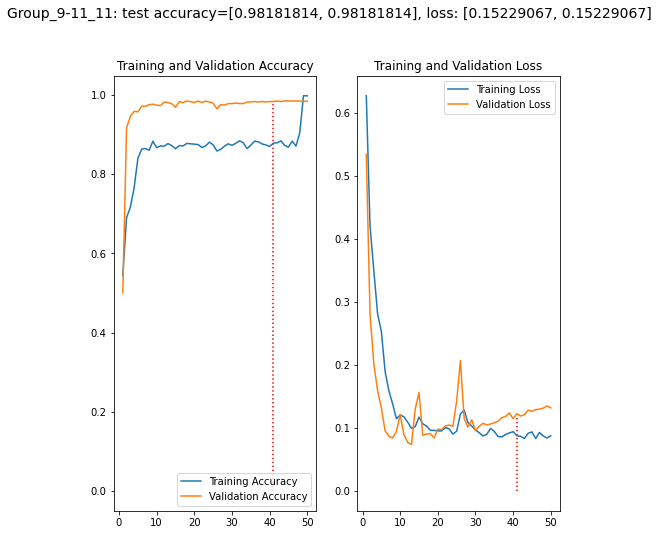

In [18]:
loss, acc = trainer.test()
print(f"performance loss: {loss} accuracy: {acc}")
trainer.plot_performance(name="task4_model_simple.png",group_no="Group_9-11_11")


***
#### Q2: What values are optimized during the training process of a CNN? Why isn't the validation accuracy increasing after some time? Why do we use a validation dataset?

#ANSWER HERE

### 3 Regularization
#### 3.1 Network Structure

With the basic model you should have achieved a test accuracy of about 95% As you can see on the last model performance, the simple model starts to overfit on the training data. One option to improve generalization is to use regularization. You can add batch normalization and dropout to do so. Update the **MaskClassifier** to include those techniques. Add dropout and batch normalization before suitable layers. Use the dropout parameter passed to the constructor for the dropout rate.

Create a new model with a dropout rate of **dropout=0.5** or **batch_norm=True** and name it **'model_regularized'**. Take a look at the structure of your model by calling ***summary(model2)***. 


In [19]:
model_regularized = my_model.MaskClassifier("model_regularized", 64, 0.5, True)
summary(model_regularized, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           --                        --
├─Sequential: 1-1                        [32, 128, 4, 4]           --
│    └─Conv2d: 2-1                       [32, 32, 64, 64]          896
│    └─ReLU: 2-2                         [32, 32, 64, 64]          --
│    └─BatchNorm2d: 2-3                  [32, 32, 64, 64]          64
│    └─MaxPool2d: 2-4                    [32, 32, 32, 32]          --
│    └─Dropout: 2-5                      [32, 32, 32, 32]          --
│    └─Conv2d: 2-6                       [32, 64, 32, 32]          18,496
│    └─ReLU: 2-7                         [32, 64, 32, 32]          --
│    └─BatchNorm2d: 2-8                  [32, 64, 32, 32]          128
│    └─MaxPool2d: 2-9                    [32, 64, 16, 16]          --
│    └─Dropout: 2-10                     [32, 64, 16, 16]          --
│    └─Conv2d: 2-11                      [32, 128, 16, 16]         73,856
│    

***
#### Q3: Compare the network structure of the model with and without regularization. What will be the effect of the dropout rate you have chosen? What is the effect of batch normalization?

#ANSWER HERE

#### 3.2 Training the network

Create a new Trainer object called **trainer2**.
Train the second network, using the same learning rate you used for the first model and set the number of epochs around **50**. 
You can use the same Data Module as for the simple model.


In [20]:
trainer2 = my_trainer.Trainer(model_regularized, datamodule,gpu=gpu_active)
trainer2.fit(epochs=50,lr=0.0001)

Epoch 0: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]


Epoch 0 Training: Loss: 0.6913409233093262 Accuracy: 0.5082703828811646
Epoch 0 Validation: Loss: 0.6926243305206299 Accuracy: 0.5013020634651184


Epoch 1: 100%|██████████| 42/42 [00:08<00:00,  4.89it/s]


Epoch 1 Training: Loss: 0.6273965835571289 Accuracy: 0.6102621555328369
Epoch 1 Validation: Loss: 0.6485036015510559 Accuracy: 0.8576388955116272


Epoch 2: 100%|██████████| 42/42 [00:08<00:00,  5.24it/s]


Epoch 2 Training: Loss: 0.4270385205745697 Accuracy: 0.8036286234855652
Epoch 2 Validation: Loss: 0.45520663261413574 Accuracy: 0.8252604007720947


Epoch 3: 100%|██████████| 42/42 [00:08<00:00,  5.06it/s]


Epoch 3 Training: Loss: 0.34306854009628296 Accuracy: 0.849759578704834
Epoch 3 Validation: Loss: 0.36608174443244934 Accuracy: 0.8662326335906982


Epoch 4: 100%|██████████| 42/42 [00:08<00:00,  4.92it/s]


Epoch 4 Training: Loss: 0.3007240891456604 Accuracy: 0.8601476550102234
Epoch 4 Validation: Loss: 0.2983008325099945 Accuracy: 0.8924479484558105


Epoch 5: 100%|██████████| 42/42 [00:09<00:00,  4.53it/s]


Epoch 5 Training: Loss: 0.2892284691333771 Accuracy: 0.8642685413360596
Epoch 5 Validation: Loss: 0.27113446593284607 Accuracy: 0.8913194537162781


Epoch 6: 100%|██████████| 42/42 [00:09<00:00,  4.56it/s]


Epoch 6 Training: Loss: 0.2703518867492676 Accuracy: 0.8705357313156128
Epoch 6 Validation: Loss: 0.2611192762851715 Accuracy: 0.8939235806465149


Epoch 7: 100%|██████████| 42/42 [00:08<00:00,  4.95it/s]


Epoch 7 Training: Loss: 0.2640290856361389 Accuracy: 0.8707646727561951
Epoch 7 Validation: Loss: 0.25554153323173523 Accuracy: 0.8952257037162781


Epoch 8: 100%|██████████| 42/42 [00:08<00:00,  4.80it/s]


Epoch 8 Training: Loss: 0.25195425748825073 Accuracy: 0.8729109168052673
Epoch 8 Validation: Loss: 0.25928807258605957 Accuracy: 0.8964409828186035


Epoch 9: 100%|██████████| 42/42 [00:07<00:00,  5.26it/s]


Epoch 9 Training: Loss: 0.24963787198066711 Accuracy: 0.8778331279754639
Epoch 9 Validation: Loss: 0.23813681304454803 Accuracy: 0.9056423306465149


Epoch 10: 100%|██████████| 42/42 [00:08<00:00,  4.84it/s]


Epoch 10 Training: Loss: 0.2399190068244934 Accuracy: 0.8880780339241028
Epoch 10 Validation: Loss: 0.22754590213298798 Accuracy: 0.9147569537162781


Epoch 11: 100%|██████████| 42/42 [00:08<00:00,  4.99it/s]


Epoch 11 Training: Loss: 0.2397974282503128 Accuracy: 0.8732829093933105
Epoch 11 Validation: Loss: 0.22396649420261383 Accuracy: 0.9122395515441895


Epoch 12: 100%|██████████| 42/42 [00:09<00:00,  4.59it/s]


Epoch 12 Training: Loss: 0.21917009353637695 Accuracy: 0.8864755034446716
Epoch 12 Validation: Loss: 0.21764755249023438 Accuracy: 0.9108507037162781


Epoch 13: 100%|██████████| 42/42 [00:08<00:00,  4.89it/s]


Epoch 13 Training: Loss: 0.22215016186237335 Accuracy: 0.8848156929016113
Epoch 13 Validation: Loss: 0.20602665841579437 Accuracy: 0.9120659828186035


Epoch 14: 100%|██████████| 42/42 [00:08<00:00,  4.94it/s]


Epoch 14 Training: Loss: 0.2140352427959442 Accuracy: 0.8882498145103455
Epoch 14 Validation: Loss: 0.2086089700460434 Accuracy: 0.9066839814186096


Epoch 15: 100%|██████████| 42/42 [00:11<00:00,  3.75it/s]


Epoch 15 Training: Loss: 0.2111075520515442 Accuracy: 0.8867903351783752
Epoch 15 Validation: Loss: 0.17767620086669922 Accuracy: 0.9239583015441895


Epoch 16: 100%|██████████| 42/42 [00:13<00:00,  3.17it/s]


Epoch 16 Training: Loss: 0.2138049304485321 Accuracy: 0.8802655339241028
Epoch 16 Validation: Loss: 0.1777903288602829 Accuracy: 0.9213541150093079


Epoch 17: 100%|██████████| 42/42 [00:15<00:00,  2.78it/s]


Epoch 17 Training: Loss: 0.20142099261283875 Accuracy: 0.8889079093933105
Epoch 17 Validation: Loss: 0.15565261244773865 Accuracy: 0.9411458373069763


Epoch 18: 100%|██████████| 42/42 [00:11<00:00,  3.68it/s]


Epoch 18 Training: Loss: 0.20472176373004913 Accuracy: 0.8914834856987
Epoch 18 Validation: Loss: 0.1667746752500534 Accuracy: 0.9397569298744202


Epoch 19: 100%|██████████| 42/42 [00:10<00:00,  4.08it/s]


Epoch 19 Training: Loss: 0.18206270039081573 Accuracy: 0.8952323198318481
Epoch 19 Validation: Loss: 0.1643896996974945 Accuracy: 0.9277777671813965


Epoch 20: 100%|██████████| 42/42 [00:11<00:00,  3.72it/s]


Epoch 20 Training: Loss: 0.18241830170154572 Accuracy: 0.8905677795410156
Epoch 20 Validation: Loss: 0.150410994887352 Accuracy: 0.9410590529441833


Epoch 21: 100%|██████████| 42/42 [00:13<00:00,  3.20it/s]


Epoch 21 Training: Loss: 0.1768028736114502 Accuracy: 0.903960645198822
Epoch 21 Validation: Loss: 0.14315751194953918 Accuracy: 0.9410590529441833


Epoch 22: 100%|██████████| 42/42 [00:09<00:00,  4.38it/s]


Epoch 22 Training: Loss: 0.18963506817817688 Accuracy: 0.8954899311065674
Epoch 22 Validation: Loss: 0.1308557242155075 Accuracy: 0.9541666507720947


Epoch 23: 100%|██████████| 42/42 [00:10<00:00,  3.87it/s]


Epoch 23 Training: Loss: 0.17477990686893463 Accuracy: 0.9057062864303589
Epoch 23 Validation: Loss: 0.13368231058120728 Accuracy: 0.9516493678092957


Epoch 24: 100%|██████████| 42/42 [00:11<00:00,  3.62it/s]


Epoch 24 Training: Loss: 0.1664007157087326 Accuracy: 0.9010702967643738
Epoch 24 Validation: Loss: 0.14159975945949554 Accuracy: 0.9554687142372131


Epoch 25: 100%|██████████| 42/42 [00:13<00:00,  3.18it/s]


Epoch 25 Training: Loss: 0.16823932528495789 Accuracy: 0.8923134803771973
Epoch 25 Validation: Loss: 0.1167033389210701 Accuracy: 0.9594618678092957


Epoch 26: 100%|██████████| 42/42 [00:08<00:00,  4.87it/s]


Epoch 26 Training: Loss: 0.1637326031923294 Accuracy: 0.9001259803771973
Epoch 26 Validation: Loss: 0.12139922380447388 Accuracy: 0.9620659947395325


Epoch 27: 100%|██████████| 42/42 [00:11<00:00,  3.67it/s]


Epoch 27 Training: Loss: 0.16903135180473328 Accuracy: 0.9006410241127014
Epoch 27 Validation: Loss: 0.1193874403834343 Accuracy: 0.9607639312744141


Epoch 28: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 28 Training: Loss: 0.16108140349388123 Accuracy: 0.8966917991638184
Epoch 28 Validation: Loss: 0.10980409383773804 Accuracy: 0.9593749642372131


Epoch 29: 100%|██████████| 42/42 [00:13<00:00,  3.13it/s]


Epoch 29 Training: Loss: 0.15980620682239532 Accuracy: 0.9019001722335815
Epoch 29 Validation: Loss: 0.10309278964996338 Accuracy: 0.9607639312744141


Epoch 30: 100%|██████████| 42/42 [00:13<00:00,  3.15it/s]


Epoch 30 Training: Loss: 0.15446338057518005 Accuracy: 0.8992101550102234
Epoch 30 Validation: Loss: 0.10920573025941849 Accuracy: 0.9607639312744141


Epoch 31: 100%|██████████| 42/42 [00:16<00:00,  2.50it/s]


Epoch 31 Training: Loss: 0.15409336984157562 Accuracy: 0.901814341545105
Epoch 31 Validation: Loss: 0.10887535661458969 Accuracy: 0.9607639312744141


Epoch 32: 100%|██████████| 42/42 [00:15<00:00,  2.70it/s]


Epoch 32 Training: Loss: 0.1475093513727188 Accuracy: 0.9134328961372375
Epoch 32 Validation: Loss: 0.11751049757003784 Accuracy: 0.9607639312744141


Epoch 33: 100%|██████████| 42/42 [00:11<00:00,  3.81it/s]


Epoch 33 Training: Loss: 0.1495470106601715 Accuracy: 0.9128891825675964
Epoch 33 Validation: Loss: 0.10847005993127823 Accuracy: 0.9658854007720947


Epoch 34: 100%|██████████| 42/42 [00:15<00:00,  2.79it/s]


Epoch 34 Training: Loss: 0.1448637843132019 Accuracy: 0.9057348966598511
Epoch 34 Validation: Loss: 0.10794643312692642 Accuracy: 0.9632812142372131


Epoch 35: 100%|██████████| 42/42 [00:12<00:00,  3.29it/s]


Epoch 35 Training: Loss: 0.1475820094347 Accuracy: 0.9078811407089233
Epoch 35 Validation: Loss: 0.10013250261545181 Accuracy: 0.9658854007720947


Epoch 36: 100%|██████████| 42/42 [00:13<00:00,  3.23it/s]


Epoch 36 Training: Loss: 0.14814375340938568 Accuracy: 0.9071084856987
Epoch 36 Validation: Loss: 0.10142514854669571 Accuracy: 0.9633681178092957


Epoch 37: 100%|██████████| 42/42 [00:11<00:00,  3.63it/s]


Epoch 37 Training: Loss: 0.1274653822183609 Accuracy: 0.9140052795410156
Epoch 37 Validation: Loss: 0.11242464929819107 Accuracy: 0.9672743678092957


Epoch 38: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 38 Training: Loss: 0.14080722630023956 Accuracy: 0.909254789352417
Epoch 38 Validation: Loss: 0.1255895346403122 Accuracy: 0.9620659947395325


Epoch 39: 100%|██████████| 42/42 [00:13<00:00,  3.18it/s]


Epoch 39 Training: Loss: 0.13584254682064056 Accuracy: 0.9143773317337036
Epoch 39 Validation: Loss: 0.11426282674074173 Accuracy: 0.9620659947395325


Epoch 40: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 40 Training: Loss: 0.13317202031612396 Accuracy: 0.943738579750061
Epoch 40 Validation: Loss: 0.1315266638994217 Accuracy: 0.9555556178092957


Epoch 41: 100%|██████████| 42/42 [00:13<00:00,  3.21it/s]


Epoch 41 Training: Loss: 0.12546098232269287 Accuracy: 0.965516209602356
Epoch 41 Validation: Loss: 0.11795084923505783 Accuracy: 0.964756965637207


Epoch 42: 100%|██████████| 42/42 [00:14<00:00,  2.85it/s]


Epoch 42 Training: Loss: 0.13686467707157135 Accuracy: 0.9673763513565063
Epoch 42 Validation: Loss: 0.11486183851957321 Accuracy: 0.9620659947395325


Epoch 43: 100%|██████████| 42/42 [00:13<00:00,  3.06it/s]


Epoch 43 Training: Loss: 0.12638260424137115 Accuracy: 0.9676339030265808
Epoch 43 Validation: Loss: 0.12278159707784653 Accuracy: 0.9633681178092957


Epoch 44: 100%|██████████| 42/42 [00:15<00:00,  2.76it/s]


Epoch 44 Training: Loss: 0.12836286425590515 Accuracy: 0.9624255895614624
Epoch 44 Validation: Loss: 0.1352185159921646 Accuracy: 0.9568576812744141


Epoch 45: 100%|██████████| 42/42 [00:20<00:00,  2.05it/s]


Epoch 45 Training: Loss: 0.12020743638277054 Accuracy: 0.9723843932151794
Epoch 45 Validation: Loss: 0.15235112607479095 Accuracy: 0.9568576812744141


Epoch 46: 100%|██████████| 42/42 [00:16<00:00,  2.55it/s]


Epoch 46 Training: Loss: 0.13032595813274384 Accuracy: 0.9685783386230469
Epoch 46 Validation: Loss: 0.10576919466257095 Accuracy: 0.9661458134651184


Epoch 47: 100%|██████████| 42/42 [00:12<00:00,  3.44it/s]


Epoch 47 Training: Loss: 0.12620608508586884 Accuracy: 0.9698660969734192
Epoch 47 Validation: Loss: 0.10569509118795395 Accuracy: 0.964756965637207


Epoch 48: 100%|██████████| 42/42 [00:08<00:00,  4.85it/s]


Epoch 48 Training: Loss: 0.11684080213308334 Accuracy: 0.9681203961372375
Epoch 48 Validation: Loss: 0.10500767827033997 Accuracy: 0.9646701812744141


Epoch 49: 100%|██████████| 42/42 [00:09<00:00,  4.44it/s]


Epoch 49 Training: Loss: 0.146006241440773 Accuracy: 0.9722126722335815
Epoch 49 Validation: Loss: 0.11759664863348007 Accuracy: 0.9621527791023254


#### 3.3 Plot Performance

Plot the performance of the second model with ***trainer2.plot_performance(..)***.

***Submission:*** Save the output of ***trainer2.plot_performance(..)*** as **task4_model_regularized.png**

performance loss: 0.12003210186958313 accuracy: 0.9662337303161621


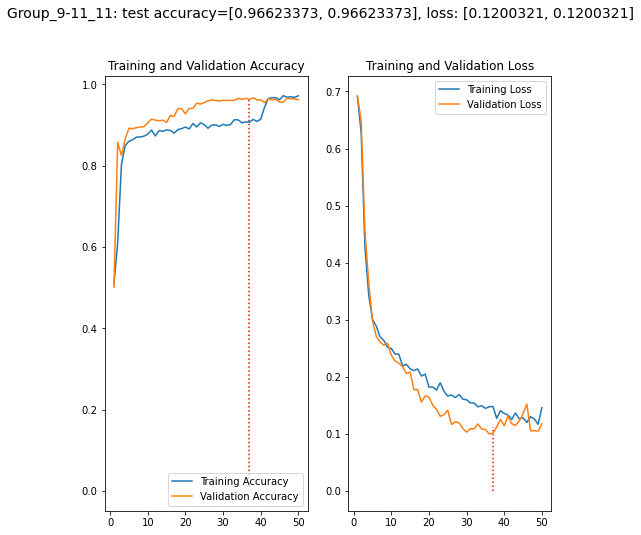

In [21]:
loss2, acc2 = trainer2.test()
print(f"performance loss: {loss2} accuracy: {acc2}")
trainer2.plot_performance(name="task4_model_regularized.png",group_no="Group_9-11_11")

***
#### Q4: Compare the performance of the model with and without regularization. Where do you see improvements?


#ANSWER HERE 

### 4 Data Augmentation
#### 4.1 Advanced Data Pre-Processing
You will enhance generalization of the network by artificially adding more variety to the training data. Implement data augmentation in **get_transforms** method of **my_datamodule**. Have a look at [torchvision transforms](https://pytorch.org/vision/stable/transforms.html) and choose at least three data augmentation techniques.

#### 4.2 Activation Maps before Training
Create a model with a dropout rate of **60%** and batch normalization. Use a learning rate of approximately **0.0007**. Call the model **'model_augmented'**.

The convolutional layers in the network are initialised with random values. We are going to compare the activation maps before and after the training process. Use ***utils.plot_activation_maps(..)*** to plot some untrained activation maps and filter kernels of the third model. 

Get two image sample of the augmented training dataset with **sample=dm2.train_dataset[...][0]**, one with a mask and one without a mask. Pass each image sample to ***utils.plot_activation_maps(..)***.


***Submission:*** Save the activation maps of the untrained model as **task4_face_activation_maps_before.png** and **task4_mask_activation_maps_before.png** using ***utils.plot_activation_maps(..)***



#### 4.3 Training the network
Create a third trainer object and train the third network here using the augmented datamodule. Set the epochs to around **100**.

Depending on your hardware this might take longer than the last training sessions.

#### 4.4. Performance Evaluation 
Plot the model performance of the third model with ***trainer3.plot_performance(..)***.

***Submission:*** Save the output of ***model.plot_curve(..)*** as **task4_model_augmented.png**

***
#### Q5: Look at the performance of the third model over time, what do you observe compared to the first two models? Explain underfitting/overfitting based on your plots.

#ANSWER HERE

#### 4.5 Activation Maps after Training
During training the weights of the model are adapted to the feature distribution of the training dataset. Plot some activation maps of the third model again using ***utils.plot_activation_maps(..)***. Use the same image samples you used before.

***Submission:*** Save the activation maps after the training as **task4_mask_activation_maps_after.png** and **task4_face_activation_maps_after.png** using ***utils.plot_activation_maps(..)***

***
#### Q6: The activations and filter kernels after the training have changed, what do you observe? Explain possible reasons.


#ANSWER HERE 

### 5 Evaluation

Calculate the confusion matrix. You can use the function **confusion_matrix** from **sklearn.metrics**. A confusion matrix within a binary decision problem shows:
 - "true positive" for correctly predicted event values.
 - "false positive" for incorrectly predicted event values.
 - "true negative" for correctly predicted no-event values.
 - "false negative" for incorrectly predicted no-event values.

You can obtain the test data and labes by using **X, y = next(iter(dm2.text_dataloader()))**. Use **trainer3.predict(X)** to obtain the predicted value. You can convert a tensor to a numpy array by using **y.detach().numpy()**. 

***
#### Q7: Compare the approach for classification from TASK3 and TASK4. Discuss advantages, disadvantages, strength and weakness. 


#ANSWER HERE